In [3]:
%matplotlib inline

# подключение библиотек
import matplotlib.pyplot as plt
import numpy as np
import copy

# формат вывода чисел
np.set_printoptions(precision=3, suppress=True, formatter={'all': lambda x: f'{x:0.6f}'}) 

In [10]:
# поиск главного элемента в матрице
def find_main_element(A, iteration):
    size = A.shape[0]
    main_element = A[iteration,iteration]
    i_main = iteration
    j_main = iteration

    for i in range(size - iteration): 
        for j in range(size - iteration):
            if abs(A[i + iteration,j + iteration]) > abs(main_element):
                i_main = i + iteration
                j_main = j + iteration
                main_element = A[i_main,j_main]
    return [i_main, j_main]

In [11]:
# Функция для обмена строк
def swap_rows(A, i, j):
    A[[i, j], :] = A[[j, i], :]

# Функция для обмена столбцов
def swap_columns(A, i, j):
    A[:, [i, j]] = A[:, [j, i]]
    
#Функция для обмена значений
def swap(a,b):
    return b,a


In [12]:
def gauss(a, f):
    
    A = copy.deepcopy(a)
    F = copy.deepcopy(f)
    
    size = len(A)  # размеры матрицы - количество переменных Х
    
    X = np.arange(size) # массив для смены порядка переменных Х
        
    for iter in range(size): # прямой ход
        
        main_indices = find_main_element(A,iter) # поиск координат главного элемента
        main_element = A[main_indices[0], main_indices[1]] # галвный элемент
        
        # если главный элемент не стоит в верхней строке, делаем перестановку строк
        if(main_indices[0] - iter != 0): 
            swap_rows(A[iter:, iter:], 0, main_indices[0] - iter)
            # swap(F[iter], F[main_indices[0]])
            F[iter] = F[main_indices[0]] + F[iter]
            F[main_indices[0]] = F[iter] - F[main_indices[0]]
            F[iter] = F[iter] - F[main_indices[0]]
            
            
        # если главный элемент не стоит в левом столбце,  делаем перестановку столбцов
        if(main_indices[1] - iter != 0): 
            swap_columns(A, iter, main_indices[1])
            # swap(X[iter], X[main_indices[1]])
            X[iter] = X[main_indices[1]] + X[iter]
            X[main_indices[1]] = X[iter] - X[main_indices[1]]
            X[iter] = X[iter] - X[main_indices[1]]
        
        # делим строчку на главный элемент
        A[iter:, iter:][0] =  A[iter:, iter:][0] / main_element #
        F[iter] = F[iter] / main_element
        
        # вычитаем из всех строк первую домноженную на соответсвующий множитель
        for i in range(size - iter - 1):
            F[iter + i + 1] -= (F[iter]  * A[iter:, iter:][i + 1][0])
            A[iter:, iter:][i + 1] -= (A[iter:, iter:][0] * A[iter:, iter:][i + 1][0])

    # приводим правый нижний элемент к 1
    F[-1] /= A[-1, -1]
    A[size - 1, size - 1] = 1
 
    U  = np.ones((size, 1)) # массив для решений СЛАУ
    
    # обратный ход
    for i in range(size-1, -1, -1):
        U[i] = F[i]
        for j in range(i + 1, size):
            U[i] -= U[j] * A[i][j]

    # перестановка переменных в изначальном порядке
    result = np.ones((size, 1))
    for i in range(size):
        result[int(X[i])][0] = U[i][0]

    # возвращаем результат
    return result



In [ ]:
a = 10
size = 100

A = np.eye(size) * (a - 1) + np.ones(size)

F = np.zeros((size, 1))
for i in range(size): F[i] = i + 1


print("A is \n", A)
print("F is \n", F)

U = gauss(A, F)

print("U is \n", U)

Res = A.dot(U)
print("A * U = \n", Res)

In [371]:
def LU(a, f):
    
    A = copy.deepcopy(a)
    F = copy.deepcopy(f)
    
    # if (is_positive(A) == -1):
    #     return

    # Размер матрицы A
    size = len(A)
    
    # Инициализируем матрицы L и U
    L = np.zeros((size, size))
    U = np.zeros((size, size))
    
    # Проходим по всем строкам и столбцам
    for i in range(size):
        # Вычисляем элементы матрицы U
        for j in range(i, size):
            U[i, j] = A[i, j] - sum(L[i, k] * U[k, j] for k in range(i))
        
        # Вычисляем элементы матрицы L
        for j in range(i, size):
            if i == j:
                L[i, i] = 1  # Диагональные элементы L равны 1
            else:
                L[j, i] = (A[j, i] - sum(L[j, k] * U[k, i] for k in range(i))) / U[i, i]

# Обратный ход для Ly = F -> ищем y

    Y = np.ones((size, 1))
            
    for i in range(0, size):
        Y[i] = F[i]
        for j in range(0, i):
            Y[i] -= Y[j] * L[i][j]

# Обратный ход для Ux = Y -> ищем x
    
    X  = np.ones((size, 1))

    for i in range(size - 1, -1, -1):
        X[i] = Y[i]
        for j in range(i + 1, size):
            X[i] -= X[j] * U[i][j]
        X[i] /= U[i][i]
        
    return X

In [ ]:
a = 10
size = 100

A = np.eye(size) * (a - 1) + np.ones(size)

F = np.zeros((size, 1))
for i in range(size): F[i] = i + 1

U = LU(A, F)

print("U is ", U)

Res = A.dot(U)
print("A * U = ", Res)

In [6]:
#Вычисление третей нормы вектора
def norm_3(U):
    r = 0
    for i in range(len(U)):
        r += U[i,0] * U[i,0]
        
    return np.sqrt(r)

In [53]:
def yakobi(a, f, x_0, eps):

    A = np.copy(a)
    F = np.copy(f)
    
    X_prev = np.copy(x_0)
    X_new = np.copy(x_0)
    
    size = len(A)
    
    k = 0
    norms = [] 
    r = norm_3(A @ X_new - F)
    
    while (r > eps and k < 1000):
        for i in range(size):
            X_new[i] = 0
            for j in range(0, size):
                if (j != i): X_new[i] = X_new[i] + A[i][j] * X_prev[j]
            X_new[i] = (F[i] - X_prev[i]) / A[i][i]
        X_prev = X_new
        
        k += 1
        r = norm_3(A @ X_new - F)
        norms.append(r)
        
        
    return X_new, k, norms

In [63]:
a = 10
size = 100


A = np.eye(size, dtype=np.float64) * (a - 1) + np.ones(size, dtype=np.float64)

F = np.zeros((size, 1), dtype=np.float64)
for i in range(size): F[i, 0] = i + 1

U_0 = np.ones((size,1), dtype=np.float64)

eps = 1e-5


# print("A = \n", A)
# print("F = \n", F)
# print("U_0 = \n", U_0)


U, k, norms_Yakobi = yakobi(A, F, U_0, eps) # ошибка в реализации Якоби, для матриц больше 10 попадает в вечный цикл и не выходит

print("U is \n", U)
print("k = ", k)
print(" def = \n", norm_3(A @ U - F))


G = gauss(A, F)
print("guass is \n",G )
print("gauss def = ", norm_3(A @ G - F))

U is 
 [[-5.036697]
 [-4.925586]
 [-4.814475]
 [-4.703364]
 [-4.592253]
 [-4.481142]
 [-4.370031]
 [-4.258920]
 [-4.147808]
 [-4.036697]
 [-3.925586]
 [-3.814475]
 [-3.703364]
 [-3.592253]
 [-3.481142]
 [-3.370031]
 [-3.258920]
 [-3.147808]
 [-3.036697]
 [-2.925586]
 [-2.814475]
 [-2.703364]
 [-2.592253]
 [-2.481142]
 [-2.370031]
 [-2.258920]
 [-2.147808]
 [-2.036697]
 [-1.925586]
 [-1.814475]
 [-1.703364]
 [-1.592253]
 [-1.481142]
 [-1.370031]
 [-1.258920]
 [-1.147808]
 [-1.036697]
 [-0.925586]
 [-0.814475]
 [-0.703364]
 [-0.592253]
 [-0.481142]
 [-0.370031]
 [-0.258919]
 [-0.147808]
 [-0.036697]
 [0.074414]
 [0.185525]
 [0.296636]
 [0.407747]
 [0.518858]
 [0.629969]
 [0.741081]
 [0.852192]
 [0.963303]
 [1.074414]
 [1.185525]
 [1.296636]
 [1.407747]
 [1.518858]
 [1.629970]
 [1.741081]
 [1.852192]
 [1.963303]
 [2.074414]
 [2.185525]
 [2.296636]
 [2.407747]
 [2.518858]
 [2.629970]
 [2.741081]
 [2.852192]
 [2.963303]
 [3.074414]
 [3.185525]
 [3.296636]
 [3.407747]
 [3.518858]
 [3.629970]

In [ ]:
# plt.figure(figsize = [12,8], dpi = 600)

# n = np.arange(0, len(norms))

# plt.plot(n, norms, 'b-')


# plt.xlabel('Итерация')
# plt.ylabel('Невязка')

# plt.xscale('log')
# plt.yscale('log')

# plt.grid()
# plt.show()

In [60]:
def seidel(a, f, x_0, eps):
    
    A = np.copy(a)
    F = np.copy(f)
    
    X_prev = np.copy(x_0)
    X_new = np.copy(x_0)
    
    size = len(A)
        
    k = 0
    r = norm_3(A @ X_new - F)
    norms = [] 
    
    while(r > eps):
        for i in range(size):
            sum1 = 0
            for j in range(i):
                sum1 += A[i, j] * X_new[j]
            
            sum2 = 0
            for j in range(i + 1, size):
                sum2 += A[i, j] * X_prev[j]
            
            X_new[i] = (F[i] - sum1 - sum2) / A[i, i]

        
        X_prev = X_new.copy()
        r = norm_3(A @ X_new - F)
        k += 1
        norms.append(r)
        
    return X_new, k, norms

In [61]:
a = 10
size = 100


A = np.eye(size, dtype=np.float64) * (a - 1) + np.ones(size, dtype=np.float64)

F = np.zeros((size, 1), dtype=np.float64)
for i in range(size): F[i, 0] = i + 1

U_0 = np.ones((size,1), dtype=np.float64)

eps = 1e-5


print("A = \n", A)
print("F = \n", F)
print("U_0 = \n", U_0)

U, k, norms_Seidel = seidel(A, F, U_0, eps)

print("U is \n", U)
print("k = ", k)
print(" def = \n", norm_3(A @ U - F))

G = gauss(A, F)
print("guass is \n",G )
print("gauss def = ", norm_3(A @ G - F))

A = 
 [[10.000000 1.000000 1.000000 ... 1.000000 1.000000 1.000000]
 [1.000000 10.000000 1.000000 ... 1.000000 1.000000 1.000000]
 [1.000000 1.000000 10.000000 ... 1.000000 1.000000 1.000000]
 ...
 [1.000000 1.000000 1.000000 ... 10.000000 1.000000 1.000000]
 [1.000000 1.000000 1.000000 ... 1.000000 10.000000 1.000000]
 [1.000000 1.000000 1.000000 ... 1.000000 1.000000 10.000000]]
F = 
 [[1.000000]
 [2.000000]
 [3.000000]
 [4.000000]
 [5.000000]
 [6.000000]
 [7.000000]
 [8.000000]
 [9.000000]
 [10.000000]
 [11.000000]
 [12.000000]
 [13.000000]
 [14.000000]
 [15.000000]
 [16.000000]
 [17.000000]
 [18.000000]
 [19.000000]
 [20.000000]
 [21.000000]
 [22.000000]
 [23.000000]
 [24.000000]
 [25.000000]
 [26.000000]
 [27.000000]
 [28.000000]
 [29.000000]
 [30.000000]
 [31.000000]
 [32.000000]
 [33.000000]
 [34.000000]
 [35.000000]
 [36.000000]
 [37.000000]
 [38.000000]
 [39.000000]
 [40.000000]
 [41.000000]
 [42.000000]
 [43.000000]
 [44.000000]
 [45.000000]
 [46.000000]
 [47.000000]
 [48.000

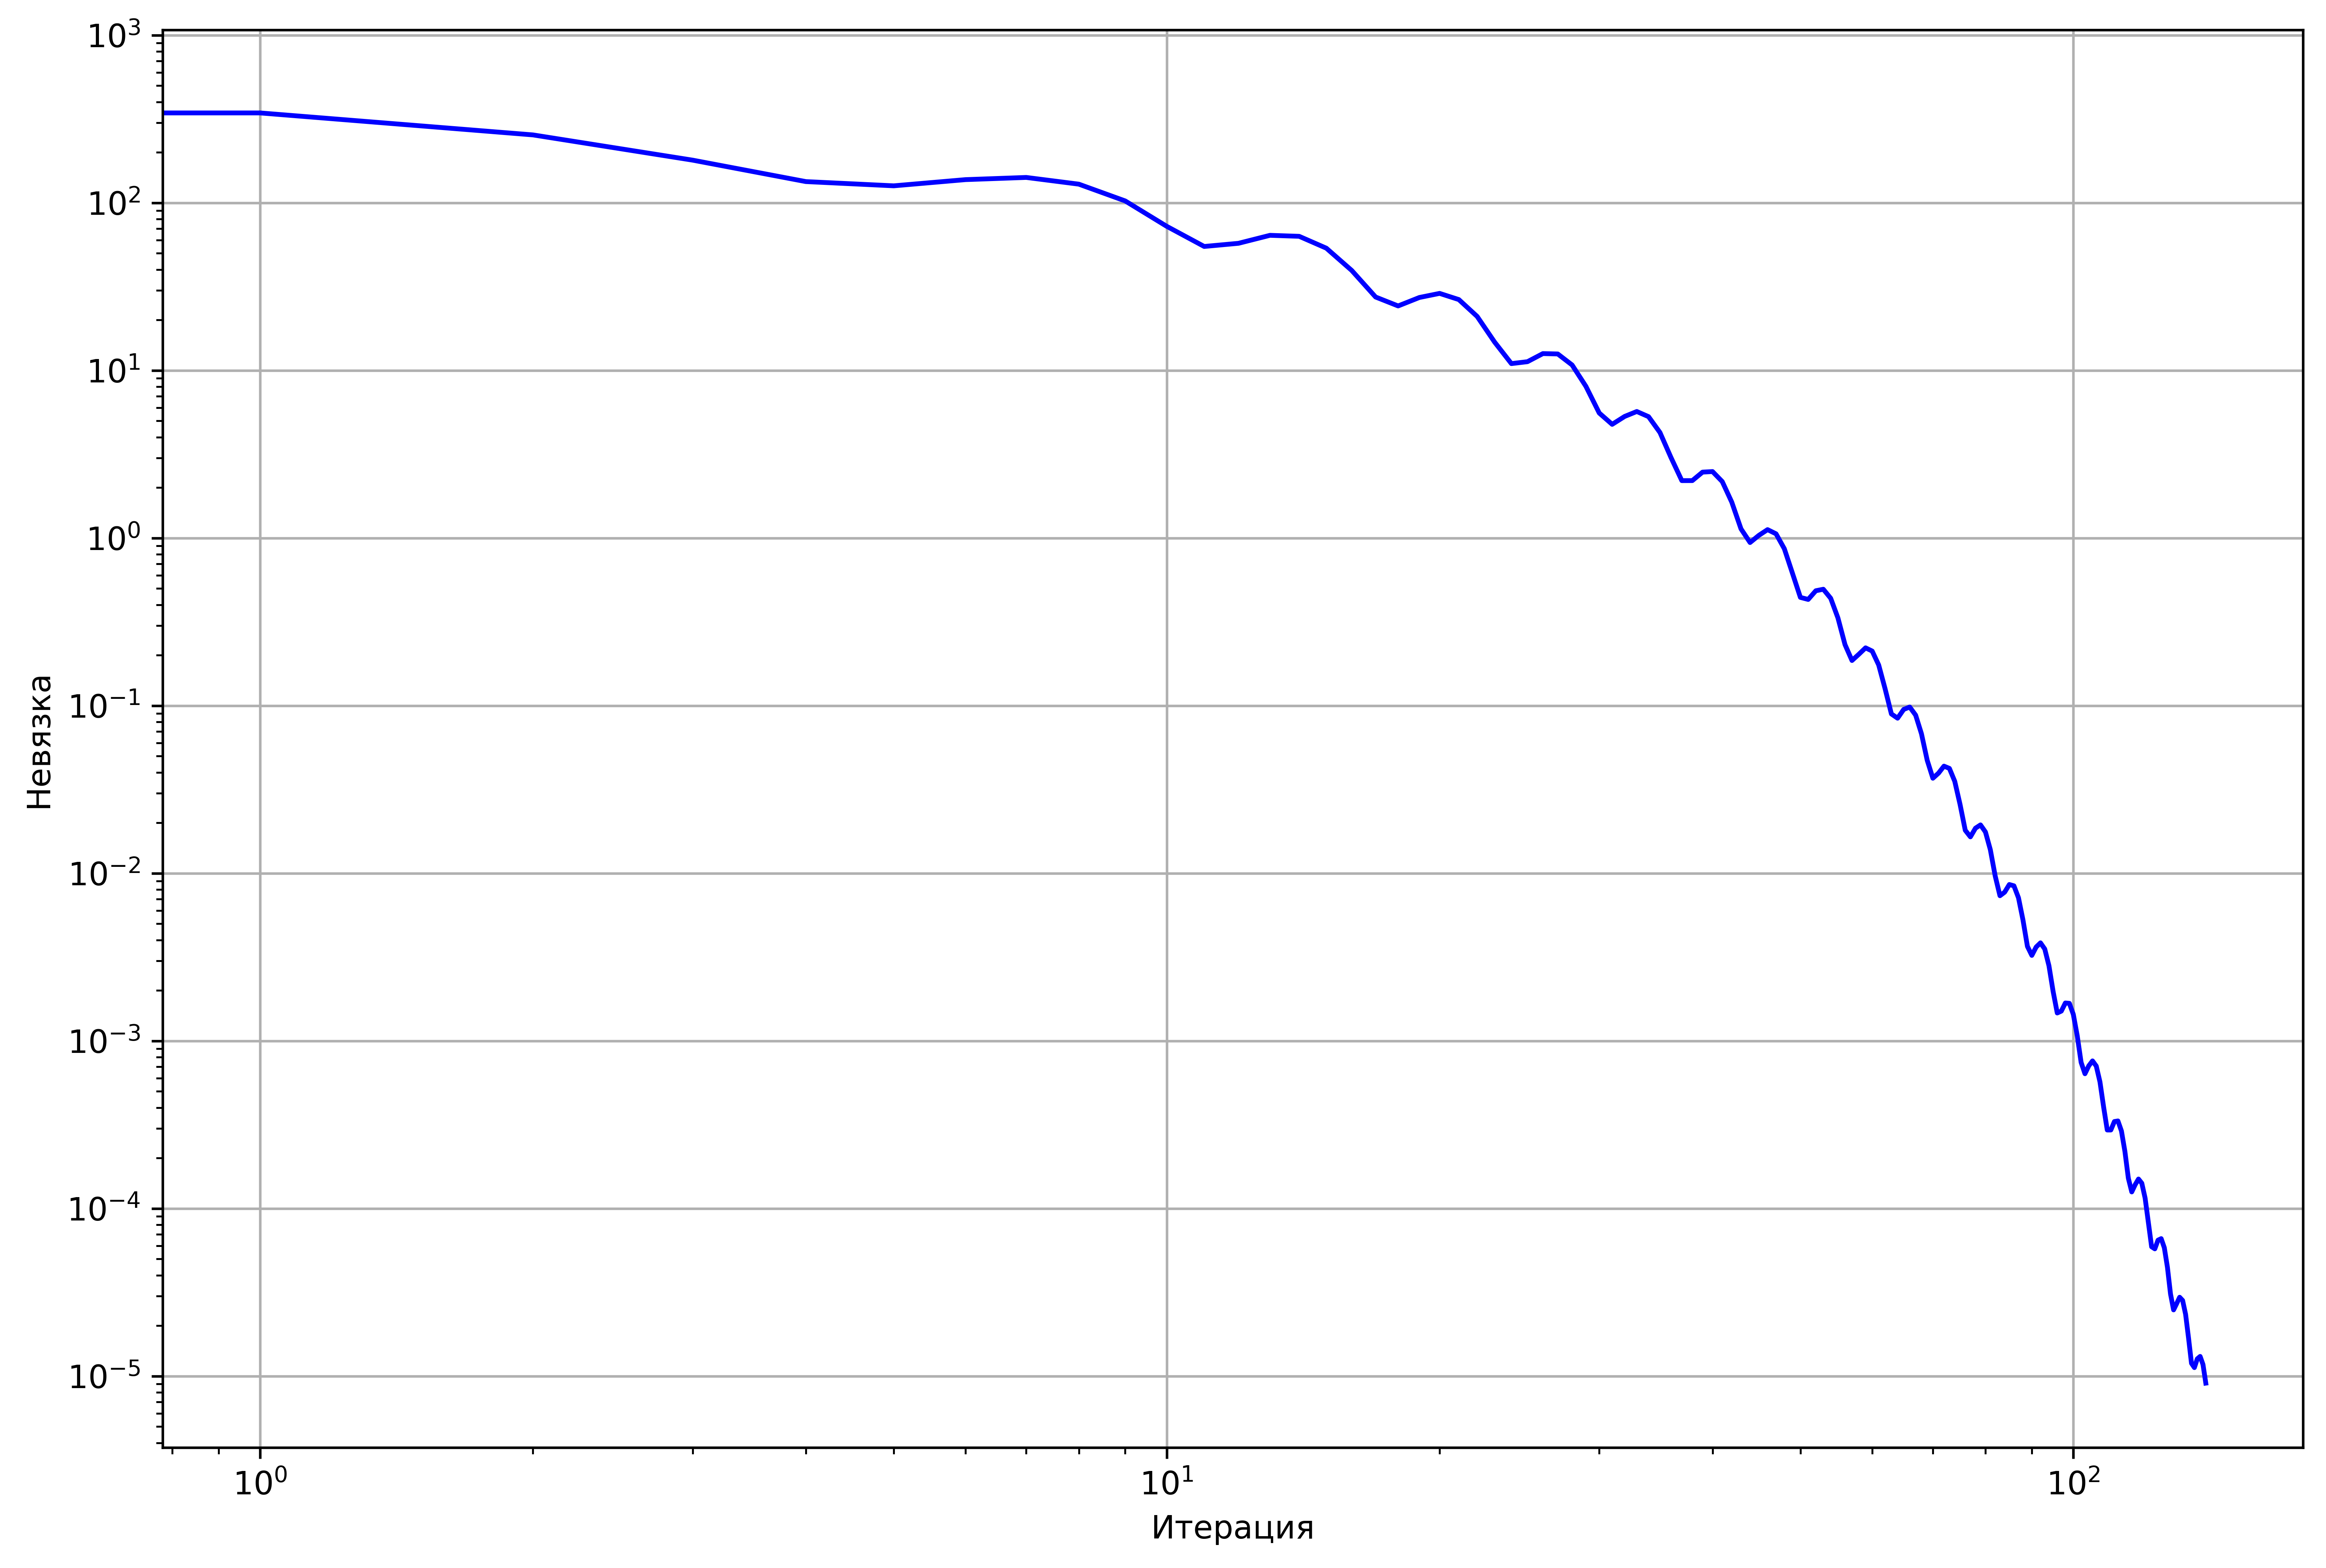

In [62]:
plt.figure(figsize = [12,8], dpi = 600)

n = np.arange(0, len(norms))

plt.plot(n, norms, 'b-')


plt.xlabel('Итерация')
plt.ylabel('Невязка')

plt.xscale('log')
plt.yscale('log')

plt.grid()
plt.show()

In [32]:
def SOR(a, f, x_0, eps, w):
    
    A = np.copy(a)
    F = np.copy(f)
    
    X_prev = np.copy(x_0)
    X_new = np.copy(x_0)
    
    size = len(A)
        
    k = 0
    r = norm_3(A @ X_new - F)
    while(r > eps and k < 1000):
        
        # for i in range(size):
        #     X_new[i] = (1 - w) * X_prev[i] - w * (sum(A[i,j] * X_new[j] for j in range(0, i)) + sum(A[i,j] * X_prev[j] for j in range(0, i)) - F[i]) / A[i,i]

        for i in range(0,size):
            sigma = 0
            for j in range(0,i):
                sigma += A[i,j] * X_new[j]
            for j in range(i+1, size):
                sigma += A[i,j] * X_prev[j]
            sigma = (F[i] - sigma) / A[i,i]
            X_new[i] = X_prev[i] + w * (sigma - X_prev[i])
        
        X_prev = X_new.copy()
        r = norm_3(A @ X_new - F)
        k += 1
        
        # print("r = ", r)
        # print("k = ", k)
        # print("X_new = \n", X_new)
        
    return X_new, k


In [33]:
a = 10
size = 100


A = np.eye(size, dtype=np.float64) * (a - 1) + np.ones(size, dtype=np.float64)

F = np.zeros((size, 1), dtype=np.float64)
for i in range(size): F[i, 0] = i + 1

U_0 = np.ones((size,1), dtype=np.float64)

eps = 1e-5
w = 1


print("A = \n", A)
print("F = \n", F)
print("U_0 = \n", U_0)


U, k = SOR(A, F, U_0, eps, w)

print("U_SOR is \n", U)
print("k = ", k)
print(" def = \n", norm_3(A @ U - F))

G = gauss(A, F)
print("guass is \n",G )
print("gauss def = ", norm_3(A @ G - F))

A = 
 [[10.000000 1.000000 1.000000 ... 1.000000 1.000000 1.000000]
 [1.000000 10.000000 1.000000 ... 1.000000 1.000000 1.000000]
 [1.000000 1.000000 10.000000 ... 1.000000 1.000000 1.000000]
 ...
 [1.000000 1.000000 1.000000 ... 10.000000 1.000000 1.000000]
 [1.000000 1.000000 1.000000 ... 1.000000 10.000000 1.000000]
 [1.000000 1.000000 1.000000 ... 1.000000 1.000000 10.000000]]
F = 
 [[1.000000]
 [2.000000]
 [3.000000]
 [4.000000]
 [5.000000]
 [6.000000]
 [7.000000]
 [8.000000]
 [9.000000]
 [10.000000]
 [11.000000]
 [12.000000]
 [13.000000]
 [14.000000]
 [15.000000]
 [16.000000]
 [17.000000]
 [18.000000]
 [19.000000]
 [20.000000]
 [21.000000]
 [22.000000]
 [23.000000]
 [24.000000]
 [25.000000]
 [26.000000]
 [27.000000]
 [28.000000]
 [29.000000]
 [30.000000]
 [31.000000]
 [32.000000]
 [33.000000]
 [34.000000]
 [35.000000]
 [36.000000]
 [37.000000]
 [38.000000]
 [39.000000]
 [40.000000]
 [41.000000]
 [42.000000]
 [43.000000]
 [44.000000]
 [45.000000]
 [46.000000]
 [47.000000]
 [48.000